## 1. Brightness Adjustment

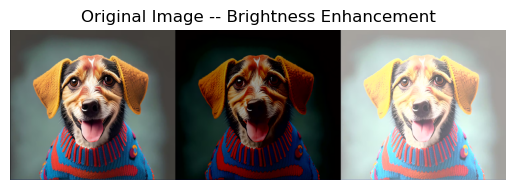

In [14]:
import cv2
import numpy as np

filename = "dog.png"
img = cv2.imread(filename)

# Specify offset factor
pos_beta = 100
neg_beta = -100

# Convert to YCrCb color space
ycbImage = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)

# Convert to float32
ycbImage = np.float32(ycbImage)

# Split the channels
Ychannel, Cr, Cb = cv2.split(ycbImage)

# Add offset to the Ychannel 
Ychannel1 = np.clip(Ychannel + pos_beta, 0, 255)
Ychannel2 = np.clip(Ychannel + neg_beta, 0, 255)

# Merge the channels and show the output
ycbImage1 = np.uint8( cv2.merge([Ychannel1, Cr, Cb]) )
ycbImage2 = np.uint8( cv2.merge([Ychannel2, Cr, Cb]) )

imbright1 = cv2.cvtColor(ycbImage1, cv2.COLOR_YCrCb2BGR)
imbright2 = cv2.cvtColor(ycbImage2, cv2.COLOR_YCrCb2BGR)

combined = np.hstack([img, imbright2, imbright1 ])
cv2.namedWindow("Original Image -- Brightness Enhancement", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image -- Brightness Enhancement", 900, 350) 
cv2.imshow("Original Image -- Brightness Enhancement", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("results/bright.jpg",combined)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Original Image -- Brightness Enhancement")
plt.axis('off')
plt.show()

## 2. Contrast Adjustment
> We will look at two ways to improve contrast of an image.

1. Intensity Scaling

1. Histogram Equalization

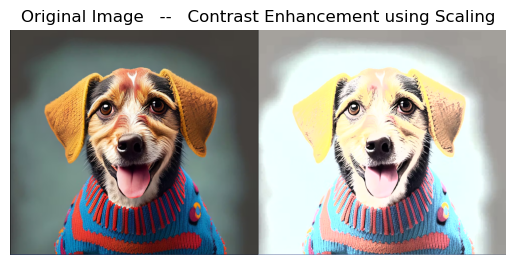

In [13]:
import cv2,argparse
import numpy as np

img = cv2.imread("dog.png")

# Specify scale factor
scaleFactor = 2.5

# Convert to YCrCb color space
ycbImage = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)

# Convert to float32 since we will be doing multiplication operation
ycbImage = np.float32(ycbImage)

# Split the channels
Ychannel, Cr, Cb = cv2.split(ycbImage)

# Scale the Ychannel 
Ychannel = np.clip(Ychannel * scaleFactor , 0, 255)

# Merge the channels and show the output
ycbImage = np.uint8( cv2.merge([Ychannel, Cr, Cb]) )

imcontrast = cv2.cvtColor(ycbImage, cv2.COLOR_YCrCb2BGR)

combined = np.hstack([img,imcontrast])
cv2.namedWindow("Original Image   --   Contrast Enhancement using Scaling", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image   --   Contrast Enhancement using Scaling", 800, 350) 
cv2.imshow("Original Image   --   Contrast Enhancement using Scaling", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("results/contrastScaling.jpg",imcontrast)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Original Image   --   Contrast Enhancement using Scaling")
plt.axis('off')
plt.show()

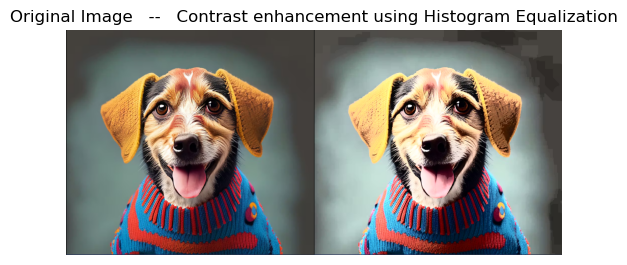

In [12]:
import cv2,argparse
import numpy as np

img = cv2.imread('dog.png')

# Convert to YCrCb color space
ycbImage = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)

# Split the channels
Ychannel, Cr, Cb = cv2.split(ycbImage)

# Perform histogram equalization of Y channel
Ychannel = cv2.equalizeHist(Ychannel)

# Merge the channels and show the output
ycbImage = cv2.merge([Ychannel, Cr, Cb])
imcontrast = cv2.cvtColor(ycbImage, cv2.COLOR_YCrCb2BGR)

combined = np.hstack([img,imcontrast])
cv2.namedWindow("Original Image   --   Contrast enhancement using Histogram Equalization", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image   --   Contrast enhancement using Histogram Equalization", 800, 350)
cv2.imshow("Original Image   --   Contrast enhancement using Histogram Equalization", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("results/contrastHistEq.jpg",imcontrast)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Original Image   --   Contrast enhancement using Histogram Equalization")
plt.axis('off')
plt.show()

## 3. Gamma Correction or Power Law Transform

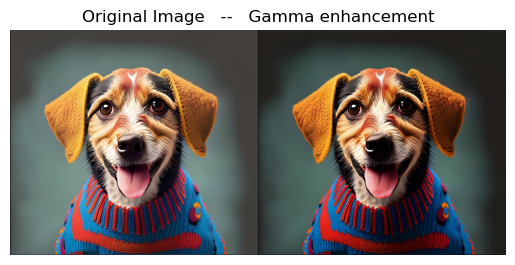

In [11]:
import cv2,argparse
import numpy as np

img = cv2.imread('dog.png')

# specify gamma
gamma = 1.5

# Full range of intensity values
fullRange = np.arange(0,256)

#create LookUp table
lut = np.uint8( 255 * np.power( (fullRange / 255.0), gamma) )

# Transform the image using LUT - it maps the pixel intensities in the input to the output using values from lut
output = cv2.LUT(img, lut)

# Show the output
combined = np.hstack([img,output])
cv2.namedWindow("Original Image   --   Gamma enhancement", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image   --   Gamma enhancement", 800,350)
cv2.imshow("Original Image   --   Gamma enhancement", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("results/gammaAdjusted.jpg",output)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Original Image   --   Gamma enhancement")
plt.axis('off')
plt.show()

## 4. Color Tone Adjustment using Curves
1. Warming Filter Code
1. Cooling Filter Code
1. Some more variations

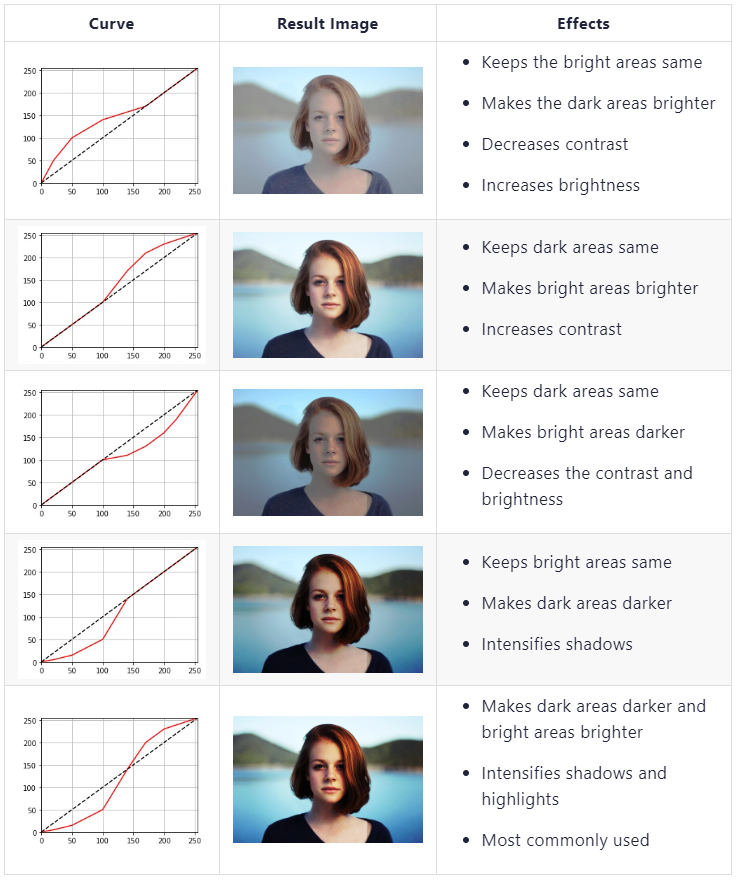

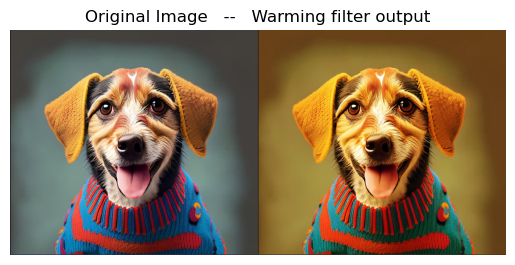

In [10]:
import cv2
import numpy as np

original = cv2.imread('dog.png')
img = np.copy(original)

# pivot points for X-Coordinates
originalValue = np.array([0, 50, 100, 150, 200, 255])

# Changed points on Y-axis for each channel
rCurve = np.array([0, 80, 150, 190, 220, 255])
bCurve = np.array([0, 20,  40,  75, 150, 255])

# Create a LookUp Table
fullRange = np.arange(0,256)
rLUT = np.interp(fullRange, originalValue, rCurve )
bLUT = np.interp(fullRange, originalValue, bCurve )

# Get the blue channel and apply the mapping
bChannel = img[:,:,0]
bChannel = cv2.LUT(bChannel, bLUT)
img[:,:,0] = bChannel

# Get the red channel and apply the mapping
rChannel = img[:,:,2]
rChannel = cv2.LUT(rChannel, rLUT)
img[:,:,2] = rChannel

# show and save the ouput
combined = np.hstack([original,img])
cv2.namedWindow("Original Image   --   Warming filter output", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image   --   Warming filter output", 800,350)
cv2.imshow("Original Image   --   Warming filter output", combined)
cv2.waitKey(0)
cv2.imwrite('results/warming.jpg',img)
cv2.destroyAllWindows()

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title('Original Image   --   Warming filter output')
plt.axis('off')
plt.show()

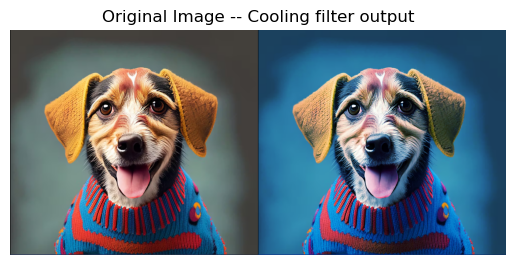

In [9]:
import cv2,argparse
import numpy as np

original = cv2.imread('dog.png')
img = np.copy(original)

# pivot points for X-Coordinates
originalValue = np.array([0, 50, 100, 150, 200, 255])

# Changed points on Y-axis for each channel
bCurve = np.array([0, 80, 150, 190, 220, 255])
rCurve = np.array([0, 20,  40,  75, 150, 255])

# Create a LookUp Table
fullRange = np.arange(0,256)
rLUT = np.interp(fullRange, originalValue, rCurve )
bLUT = np.interp(fullRange, originalValue, bCurve )

# Get the blue channel and apply the mapping
bChannel = img[:,:,0]
bChannel = cv2.LUT(bChannel, bLUT)
img[:,:,0] = bChannel

# Get the red channel and apply the mapping
rChannel = img[:,:,2]
rChannel = cv2.LUT(rChannel, rLUT)
img[:,:,2] = rChannel

# show and save the ouput
combined = np.hstack([original,img])
cv2.namedWindow("Original Image   --   Cooling filter output", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image   --   Cooling filter output", 800,350)
cv2.imshow("Original Image   --   Cooling filter output", combined)
cv2.waitKey(0)
cv2.imwrite('results/cooling.jpg',img)
cv2.destroyAllWindows()

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title('Original Image -- Cooling filter output')
plt.axis('off')
plt.show()

## 1. Instagram Filters
1. Clarendon
1. Kelvin
1. Moon
1. X-Pro II

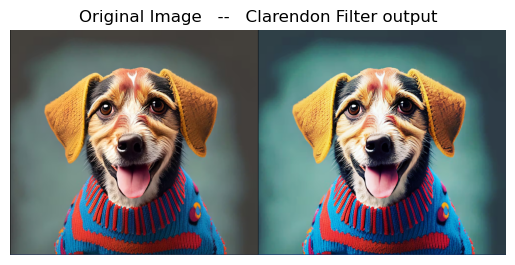

In [18]:
import cv2, argparse
import numpy as np

def clarendon(original):

  img = np.copy(original)

  # Separate the channels
  bChannel = img[:,:,0]
  gChannel = img[:,:,1]
  rChannel = img[:,:,2]

  # Specifying the x-axis for mapping
  xValues = np.array([0, 28, 56, 85, 113, 141, 170, 198, 227, 255])

  # Specifying the y-axis for different channels
  rCurve = np.array([0, 16, 35, 64, 117, 163, 200, 222, 237, 249 ])
  gCurve = np.array([0, 24, 49, 98, 141, 174, 201, 223, 239, 255 ])
  bCurve = np.array([0, 38, 66, 104, 139, 175, 206, 226, 245, 255 ])

  # Creating the LUT to store the interpolated mapping
  fullRange = np.arange(0,256)
  bLUT = np.interp(fullRange, xValues, bCurve )
  gLUT = np.interp(fullRange, xValues, gCurve )
  rLUT = np.interp(fullRange, xValues, rCurve ) 

  # Applying the mapping to the image using LUT
  bChannel = cv2.LUT(bChannel, bLUT)
  gChannel = cv2.LUT(gChannel, gLUT)
  rChannel = cv2.LUT(rChannel, rLUT)

  # Converting back to uint8
  img[:,:,0] = np.uint8(bChannel)
  img[:,:,1] = np.uint8(gChannel)
  img[:,:,2] = np.uint8(rChannel)

  return img

img = cv2.imread('dog.png')

output = clarendon(img)

combined = np.hstack([img,output])
cv2.namedWindow("Original Image   --   Clarendon Filter output", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image   --   Clarendon Filter output", 800,350)
cv2.imshow("Original Image   --   Clarendon Filter output", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("results/clarendon.jpg",output)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title('Original Image   --   Clarendon Filter output')
plt.axis('off')
plt.show()

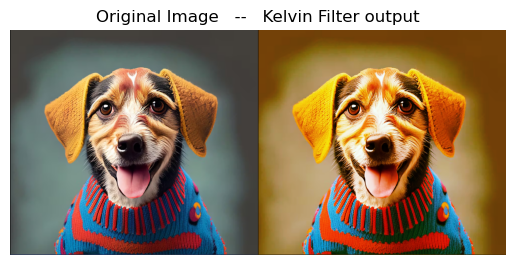

In [20]:
import cv2, argparse
import numpy as np

def kelvin(original):

  img = np.copy(original)

  # Separate the channels
  bChannel = img[:,:,0]
  gChannel = img[:,:,1]
  rChannel = img[:,:,2]

  # Specifying the x-axis for mapping 
  originalR = np.array([0, 60, 110, 150, 235, 255])
  originalG = np.array([0, 68, 105, 190, 255])
  originalB = np.array([0, 88, 145, 185, 255])

  # Specifying the y-axis for mapping
  rCurve = np.array([0, 102, 185, 220, 245, 245 ])
  gCurve = np.array([0, 68, 120, 220, 255 ])
  bCurve = np.array([0, 12, 140, 212, 255])

  # Creating the LUT to store the interpolated mapping
  fullRange = np.arange(0,256)
  bLUT = np.interp(fullRange, originalB, bCurve )
  gLUT = np.interp(fullRange, originalG, gCurve )
  rLUT = np.interp(fullRange, originalR, rCurve )
 

  # Applying the mapping to the image using LUT
  bChannel = cv2.LUT(bChannel, bLUT)
  gChannel = cv2.LUT(gChannel, gLUT)
  rChannel = cv2.LUT(rChannel, rLUT)
  
  # Converting back to uint8
  img[:,:,0] = np.uint8(bChannel)
  img[:,:,1] = np.uint8(gChannel)
  img[:,:,2] = np.uint8(rChannel)

  return img

img = cv2.imread('dog.png')

output = kelvin(img)

combined = np.hstack([img,output])
cv2.namedWindow("Original Image   --   Kelvin Filter output", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image   --   Kelvin Filter output", 800,350)
cv2.imshow("Original Image   --   Kelvin Filter output", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("results/kelvin.jpg",output)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title('Original Image   --   Kelvin Filter output')
plt.axis('off')
plt.show()

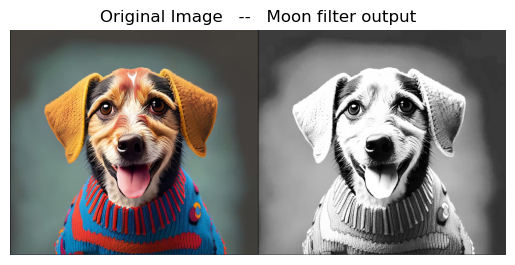

In [2]:
import cv2, argparse
import numpy as np

def adjustSaturation(original, saturationScale = 1.0):
  img = np.copy(original)

  # Convert to HSV color space
  hsvImage = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

  # Convert to float32
  hsvImage = np.float32(hsvImage)

  # Split the channels
  H, S, V = cv2.split(hsvImage)

  # Multiply S channel by scaling factor 
  S = np.clip(S * saturationScale , 0, 255)

  # Merge the channels and show the output
  hsvImage = np.uint8( cv2.merge([H, S, V]) )

  imSat = cv2.cvtColor(hsvImage, cv2.COLOR_HSV2BGR)
  return imSat

def moon(original):

  img = np.copy(original)

  # Specifying the x-axis for mapping
  origin = np.array([0, 15, 30, 50, 70, 90, 120, 160, 180, 210, 255 ])
  
  # Specifying the y-axis for mapping
  Curve = np.array([0, 0, 5, 15, 60, 110, 150, 190, 210, 230, 255  ])

  # Creating the LUT to store the interpolated mapping
  fullRange = np.arange(0,256)

  LUT = np.interp(fullRange, origin, Curve )

  # Applying the mapping to the L channel of the LAB color space
  labImage = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)
  labImage[:,:,0] = cv2.LUT(labImage[:,:,0], LUT)
  img = cv2.cvtColor(labImage,cv2.COLOR_LAB2BGR)

  # Desaturating the image
  img = adjustSaturation(img,0.01)

  return img

img = cv2.imread('dog.png')

output = moon(img)

combined = np.hstack([img,output])
cv2.namedWindow("Original Image   --   Moon filter output", cv2.WINDOW_NORMAL)
cv2.resizeWindow("Original Image   --   Moon filter output", 800, 350)
cv2.imshow("Original Image   --   Moon filter output", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("results/moon.jpg",output)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Original Image   --   Moon filter output")
plt.axis('off')
plt.show()

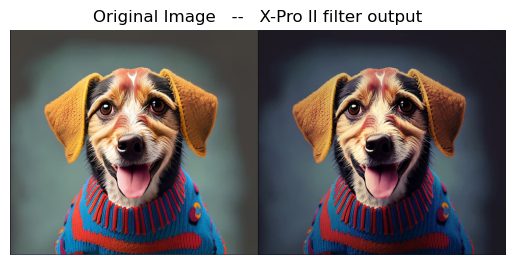

In [5]:
import cv2, argparse
import numpy as np

def adjustContrast(original, scaleFactor): 
  img = np.copy(original)

  # Convert to YCrCb color space
  ycbImage = cv2.cvtColor(img,cv2.COLOR_BGR2YCrCb)

  # Convert to float32 since we will be doing multiplication operation
  ycbImage = np.float32(ycbImage)

  # Split the channels
  Ychannel, Cr, Cb = cv2.split(ycbImage)

  # Scale the Ychannel 
  Ychannel = np.clip(Ychannel * scaleFactor , 0, 255)

  # Merge the channels and show the output
  ycbImage = np.uint8( cv2.merge([Ychannel, Cr, Cb]) )

  img = cv2.cvtColor(ycbImage, cv2.COLOR_YCrCb2BGR)

  return img

def applyVignette(original, vignetteScale):
  img = np.copy(original)

  # convert to float
  img = np.float32(img)
  rows,cols = img.shape[:2]

  # Compute the kernel size from the image dimensions
  k = np.min(img.shape[:2])/vignetteScale

  # Create a kernel to get the halo effect 
  kernelX = cv2.getGaussianKernel(cols,k)
  kernelY = cv2.getGaussianKernel(rows,k)

  # generating vignette mask using Gaussian kernels
  kernel = kernelY * kernelX.T

  # Normalize the kernel
  mask = 255 * kernel / np.linalg.norm(kernel)

  mask = cv2.GaussianBlur(mask, (51,51), 0)


  # Apply the halo to all the channels of the image
  img[:,:,0] += img[:,:,0]*mask
  img[:,:,1] += img[:,:,1]*mask
  img[:,:,2] += img[:,:,2]*mask

  img = np.clip(img/2, 0, 255)

  # cv2.imshow("mask",mask)
  # cv2.waitKey(0)
  # cv2.imwrite("results/vignetteMask.jpg", 255*mask)

  return np.uint8(img)

def xpro2(original, vignetteScale=3):

  img = np.copy(original)

  # Applying a vignette with some radius
  img = applyVignette(img, vignetteScale) 

  # Separate the channels
  bChannel = img[:,:,0]
  gChannel = img[:,:,1]
  rChannel = img[:,:,2]

  # Specifying the x-axis for mapping
  originalR = np.array([0, 42, 105, 148, 185, 255])
  originalG = np.array([0, 40, 85, 125, 165, 212, 255])
  originalB = np.array([0, 40, 82, 125, 170, 225, 255 ])
  
  # Specifying the y-axis for mapping
  rCurve = np.array([0, 28, 100, 165, 215, 255 ])
  gCurve = np.array([0, 25, 75, 135, 185, 230, 255 ])
  bCurve = np.array([0, 38, 90, 125, 160, 210, 222])
  
  # Creating the LUT to store the interpolated mapping
  fullRange = np.arange(0,256)
  bLUT = np.interp(fullRange, originalB, bCurve )
  gLUT = np.interp(fullRange, originalG, gCurve )
  rLUT = np.interp(fullRange, originalR, rCurve )


  # Applying the mapping to the image using LUT
  bChannel = cv2.LUT(bChannel, bLUT)
  gChannel = cv2.LUT(gChannel, gLUT)
  rChannel = cv2.LUT(rChannel, rLUT)

  # Converting back to uint8
  img[:,:,0] = np.uint8(bChannel)
  img[:,:,1] = np.uint8(gChannel)
  img[:,:,2] = np.uint8(rChannel) 

  # Adjusting the contrast a bit - just for fun!
  img = adjustContrast(img,1.2)

  return img

img = cv2.imread('dog.png')

output = xpro2(img)

combined = np.hstack([img,output])
cv2.namedWindow("Original Image   --   X-Pro II filter output", cv2.WINDOW_NORMAL)
cv2.resizeWindow('Original Image   --   X-Pro II filter output', 800,350)
cv2.imshow("Original Image   --   X-Pro II filter output", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("results/xpro.jpg",output)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Original Image   --   X-Pro II filter output")
plt.axis('off')
plt.show()


## 2. More photographic Filters
In this section we will design 3 more filters using the concepts we have learned in the previous sections. The concepts that will be useful in this section are :

1. Edge Detection using laplacian and sobel filters
1. Image Blurring using gaussian kernels
1. Image denoising using Gaussian filter
1. Edge preserving filter - Bilateral filter
1. Thresholding operations
1. Blending two images using add, multiply or divide.

### 2.1. Pencil Sketch using Edge Detection
In this section we will learn how to convert an image to a pencil sketch. As you might have seen in the previous section that edge detection can produce the outline or boundaries of the image. We will use the same concept with some pre and post processing to get a reasonable pencil sketch of the image. Given below are the steps for arriving at the pencil sketch:

1. Convert the image into grayscale
1. Apply Gaussian blur.
1. Use the Laplacian operator to find the edges
1. Invert the image
1. Apply the Binary threshold

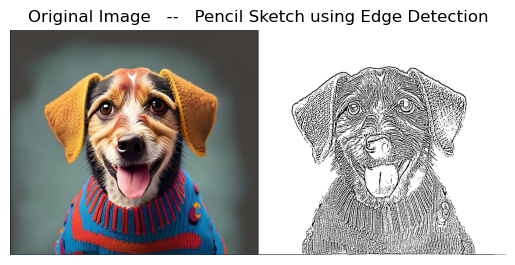

In [8]:
import cv2, argparse
import numpy as np
#In this below function, we convert the image to grayscale and find the edges. Then we invert the image and apply threshold to arrive at the pencil sketch.

def sketchPencilUsingEdgeDetection(original):
  img = np.copy(original)
  # Convert image to grayscale
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #Grayscale Image

  # Apply Gaussian filter to the grayscale image
  imgGrayBlur = cv2.GaussianBlur(imgGray, (3,3), 0)

  #After Gaussian Blurring

  # Detect edges in the image and threshold it
  edges = cv2.Laplacian(imgGrayBlur, cv2.CV_8U, ksize=5)

  #After Edge Detection
 
  edges = 255 - edges 

  #After Inverting the edges
 
  ret, edgeMask = cv2.threshold(edges, 150, 255, cv2.THRESH_BINARY)

  #After Thresholding
 
  return cv2.cvtColor(edgeMask, cv2.COLOR_GRAY2BGR)
  #Here, we read the image from the file and call the function defined above. Finally, we display the output.

img = cv2.imread('dog.png')

output = sketchPencilUsingEdgeDetection(img)

combined = np.hstack([img,output])
cv2.namedWindow("Original Image   --   Pencil Sketch using Edge Detection", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Original Image   --   Pencil Sketch using Edge Detection", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("results/pencilEdge.jpg",output)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Original Image   --   Pencil Sketch using Edge Detection")
plt.axis('off')
plt.show()

### 2.2. Pencil Sketch using Blending
>In this section we will look at another method to get the pencil sketch of an image. We will introduce Color Dodge Blending which is the core of this method. This method does not require any edge detection or thresholding operation. It is also very simple to implement. Given below are the steps to get the pencil sketch:

1. Convert image to grayscale.
1. Invert the image.
1. Apply Gaussian blurring.
1. Apply Color Dodge Blending

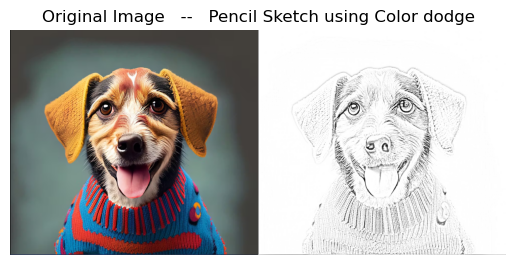

In [11]:
import cv2, argparse
import numpy as np

def colorDodge(top, bottom):
  
  # divid the bottom by inverted top image and scale back to 250
  output = cv2.divide(bottom, 255 - top , scale = 256)
  
  return output

def sketchPencilUsingBlending(original,kernelSize = 21):
  img = np.copy(original)

  # Convert to grayscale
  imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

  #Grayscale Image
 

  # Invert the grayscale image
  imgGrayInv = 255 - imgGray

  #Inverted Grayscale Image

  # Apply GaussianBlur
  imgGrayInvBlur =  cv2.GaussianBlur(imgGrayInv, (kernelSize,kernelSize), 0)

  #After Blurring

  # blend using color dodge
  output = colorDodge(imgGrayInvBlur, imgGray)


  return cv2.cvtColor(output, cv2.COLOR_GRAY2BGR)

img = cv2.imread('dog.png')

output = sketchPencilUsingBlending(img)
combined = np.hstack([img,output])
cv2.namedWindow("Original Image   --   Pencil Sketch using Color dodge", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Original Image   --   Pencil Sketch using Color dodge", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite("results/pencilBlend.jpg",output)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Original Image   --   Pencil Sketch using Color dodge")
plt.axis('off')
plt.show()

### 2.3. Cartoon Filter

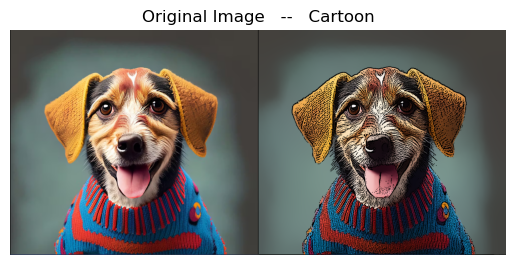

In [13]:
def makeCartoon(original):

  # Make a copy of the origianl image to work with
  img = np.copy(original)

  # Convert image to grayscale
  imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Apply gaussian filter to the grayscale image
  imgGray = cv2.GaussianBlur(imgGray, (3,3), 0)

  # Detect edges in the image and threshold it
  edges = cv2.Laplacian(imgGray, cv2.CV_8U, ksize=5)
  edges = 255 - edges
  ret, edgeMask = cv2.threshold(edges, 150, 255, cv2.THRESH_BINARY)

  #Edge Mask
 
  # Apply Edge preserving filter to get the heavily blurred image
  imgBilateral = cv2.edgePreservingFilter(img, flags=2, sigma_s=50, sigma_r=0.4)

  #Result of Edge Preserving Filter

  # Create a outputmatrix
  output = np.zeros(imgGray.shape)
  
  # Combine the cartoon and edges 
  output = cv2.bitwise_and(imgBilateral, imgBilateral, mask=edgeMask)

  #Combined Output
  return output

img = cv2.imread('dog.png')

output = makeCartoon(img)
combined = np.hstack([img,output])
cv2.namedWindow("Original Image   --   Cartoon", cv2.WINDOW_AUTOSIZE)
cv2.imshow("Original Image   --   Cartoon", combined)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite("results/cartoon.jpg",output)

# Display the combined image using Matplotlib
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(combined, cv2.COLOR_BGR2RGB))
plt.title("Original Image   --   Cartoon")
plt.axis('off')
plt.show()